In [22]:
import pandas as pd
import pprint

df = pd.read_csv("Privatkonto Ung.csv", sep=";", encoding="ISO-8859-1")
needed_df = df[["Dato", "Kategori", "Underkategori", "Beløb", "Saldo"]]

budget = {
    "Omada": 6500,
    "SU": 5500,
    "Mad": -2000,
    "Bolig + El": -5500,
    "Projekter": -1500,
    "Diverse": -1000,
    "Transport": -500,
}
budget_total = sum(list(budget.values()))

monthly_split = {

}

for i, row in df.iterrows():
    day, month, year = row["Dato"].split(".")
    if year not in monthly_split:
        monthly_split[year] = {}
    if month not in monthly_split[year]:
        monthly_split[year][month] = {}
    underkat = row["Kategori"]
    if underkat not in monthly_split[year][month]:
        monthly_split[year][month][underkat] = 0
    monthly_split[year][month][underkat] += float(row["Beløb"].replace(".", "").replace(",", "."))
    if "saldo" not in monthly_split[year][month]:
         monthly_split[year][month]["saldo"] = (float(row["Saldo"].replace(".", "").replace(",", ".")), int(day))
    if int(day) > monthly_split[year][month]["saldo"][1]:
        monthly_split[year][month]["saldo"] = (float(row["Saldo"].replace(".", "").replace(",", ".")), int(day))

for year in monthly_split:
    for month in monthly_split[year]:
        total = 0
        for k in monthly_split[year][month]:
            if k == "saldo":
                continue
            total += monthly_split[year][month][k]
        monthly_split[year][month]["total"] = total

pprint.pprint(monthly_split)

{'2023': {'11': {'Bolig': -375.0,
                 'Fritid': -625.9300000000001,
                 'Indtægter': 13942.9,
                 'Mad og indkøb': -1830.1999999999998,
                 'Medier': -111.58,
                 'Transport': -340.0,
                 'saldo': (22029.55, 30),
                 'total': 10660.19},
          '12': {'Andet': -2673.0,
                 'Bolig': -5489.62,
                 'Fritid': -1359.7,
                 'Indtægter': 11782.45,
                 'Lån og gæld': 41.79,
                 'Mad og indkøb': -810.6,
                 'Medier': -1714.68,
                 'Transport': -1126.0,
                 'saldo': (20680.19, 29),
                 'total': -1349.3599999999994}},
 '2024': {'01': {'Andet': -948.76,
                 'Bolig': -5539.0,
                 'Forsikringer': -407.0,
                 'Fritid': -2033.1599999999999,
                 'Indtægter': 20301.0,
                 'Mad og indkøb': -2258.4900000000002,
                 'Medier

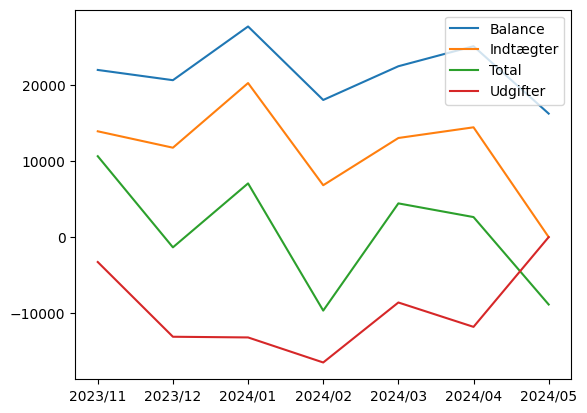

In [23]:
import matplotlib.pyplot as plt

saldos = list(reversed([monthly_split[year][month]["saldo"][0] for year in monthly_split for month in monthly_split[year]]))
saldos_dates = list(reversed([str(year) + "/" + str(month) for year in monthly_split for month in monthly_split[year]]))

indtægter = list(reversed([monthly_split[year][month]["Indtægter"] for year in monthly_split for month in monthly_split[year] if "Indtægter" in monthly_split[year][month]]))
total = list(reversed([monthly_split[year][month]["total"] for year in monthly_split for month in monthly_split[year]]))
expense = [total[i] - indtægter[i] for i in range(len(indtægter))]

while len(indtægter) < 7:
    indtægter.append(0)

while len(expense) < 7:
    expense.append(0)


plt.plot(saldos_dates, saldos, label = "Balance")
plt.plot(saldos_dates, indtægter, label = "Indtægter")
plt.plot(saldos_dates, total, label = "Total")
plt.plot(saldos_dates, expense, label = "Udgifter")
plt.legend()

In [34]:
budget_total_lst = [budget_total] * len(total)
diff_lst = ["+" + str(round(t - bt, 0)) if t - bt > 0 else str(round(t - bt, 0)) for (bt, t) in zip(budget_total_lst, total)]
df_total = pd.DataFrame([[sd, b, t, d] for sd, b, t, d in zip(saldos_dates, budget_total_lst, total, diff_lst)], columns=["Month", "Budget Total", "Actual Total", "Diff"])
df_total

,Month,Budget Total,Actual Total,Diff
0,2023/11,1500,10660.19,+9160.0
1,2023/12,1500,-1349.36,-2849.0
2,2024/01,1500,7078.00,+5578.0
3,2024/02,1500,-9684.68,-11185.0
4,2024/03,1500,4444.10,+2944.0
5,2024/04,1500,2640.24,+1140.0
6,2024/05,1500,-8882.55,-10383.0


In [41]:
deep_lst = [["Budget", 12000, -5500, -2000, 0, 0, -500, -200, -1500, -800]]
keys = ["Indtægter", "Bolig", "Mad og indkøb", "Medier", "Sko, tøj og personlig pleje", "Transport", "Forsikringer", "Fritid", "Andet"]
columns = ["Month"] + keys

for i in range(len(saldos_dates)):
    total = 0
    lst = []
    lst.append(saldos_dates[i])
    year, month = saldos_dates[i].split("/")
    for key in keys:
        if key == "Andet":
            lst.append(monthly_split[year][month]["total"] - total)
            continue
        if key in monthly_split[year][month]:
            lst.append(monthly_split[year][month][key])
            total += monthly_split[year][month][key]
        else:
            lst.append(0)
    deep_lst.append(lst)

df_deep = pd.DataFrame(deep_lst, columns = columns)
df_deep

,Month,Indtægter,Bolig,Mad og indkøb,Medier,"Sko, tøj og personlig pleje",Transport,Forsikringer,Fritid,Andet
0,Budget,12000.00,-5500.00,-2000.00,0.00,0.00,-500.00,-200.0,-1500.00,-800.00
1,2023/11,13942.90,-375.00,-1830.20,-111.58,0.00,-340.00,0.0,-625.93,0.00
2,2023/12,11782.45,-5489.62,-810.60,-1714.68,0.00,-1126.00,0.0,-1359.70,-2631.21
3,2024/01,20301.00,-5539.00,-2258.49,-312.82,-1005.00,-718.77,-407.0,-2033.16,-948.76
4,2024/02,6838.00,-7317.67,-1875.15,0.00,0.00,-930.00,0.0,-728.00,-5671.86
5,2024/03,13061.66,-5306.90,-2111.20,-368.92,0.00,-110.00,0.0,-480.00,-240.54
6,2024/04,14469.60,-5442.75,-2767.04,-175.95,0.00,-2405.00,-407.0,-435.95,-195.67
7,2024/05,0.00,-4188.67,-807.90,0.00,-579.85,-300.00,-120.0,-1601.00,-1285.13
